**Week 3 - Plots**

In the opposition to the first two lectures, this one doesn't contain a lot of tightly-packed information.
We will just see how easy it is to produce plots in python.
I leave the rest to googling.

Plotly plots sometimes have troubles rendering on GitHub and in html files.
Run this notebook localy to see all the plots correctly.

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd

## Basic plots with matplotlib

The most basic plotting library in python is matplotlib.
The approach to plots is based on matlab.
Matplotlib produces lightweight plot is on of fundamentals of data scientists tool set.


In [2]:
x = np.r_[0:10:100j]
y = np.sin(x)
y2 = np.cos(x)

If you use `plt.plot()` in script, not in notebook, you have to call `plt.show()` if you want to... show the plot. 

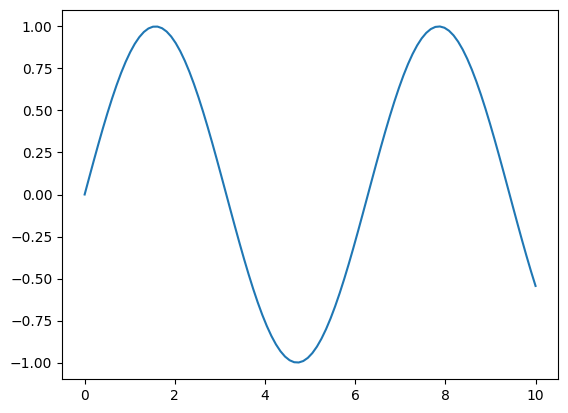

In [3]:
plt.plot(x, y)

You can easily change type of line

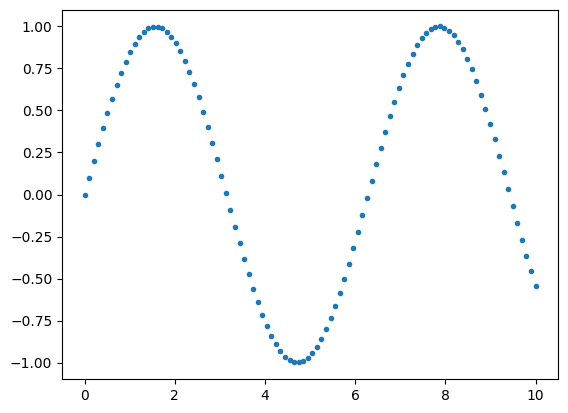

In [4]:
plt.plot(x, y, ".")

Add different data

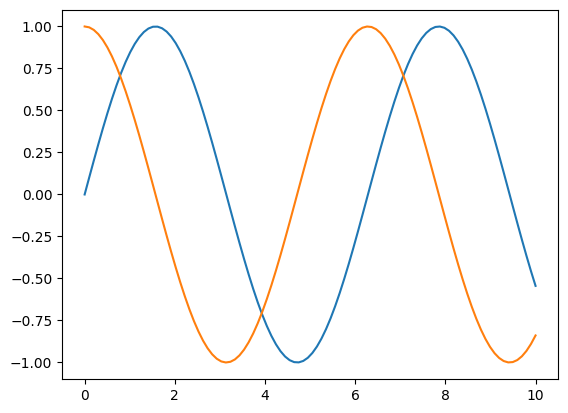

In [5]:
plt.plot(x, y, x, y2)

Change labels

Text(0, 0.5, 'Happiness')

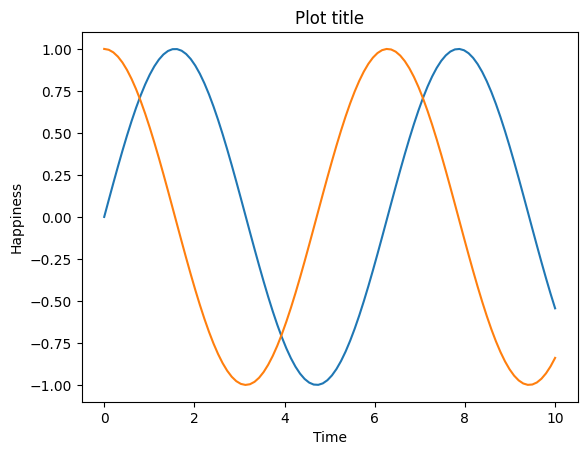

In [6]:
plt.plot(x, y, x, y2)
plt.title("Plot title")
plt.xlabel("Time")
plt.ylabel("Happiness")

Add legend

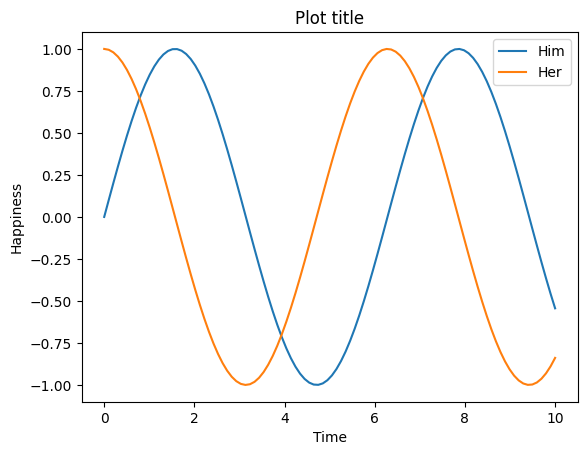

In [7]:
plt.plot(x, y, label="Him")
plt.plot(x, y2, label="Her")
plt.title("Plot title")
plt.xlabel("Time")
plt.ylabel("Happiness")
plt.legend()

Matplotlib is a great tool to produce plots for reports, to print.
It has [a very detailed documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).
However, it lacks interactivity, that's when you use plotly.

## Basic plots with `plotly.express`

Plotly is able to produce highly interactive plots with ease!
Just look at the examples.

In [8]:
px.line(x=x, y=y)

In [9]:
px.line(x=x, y=[y, y2], title="Relationship plot", labels={'x': 'Time', 'value':"Happiness"})

Unfortunately to change labels you have to do this [kind of black magic](https://stackoverflow.com/a/64378982/16521949):

In [10]:
fig = px.line(x=x, y=[y, y2], title="Relationship plot", labels={'x': 'Time', 'value':"Happiness"})
newnames = {'wide_variable_0':'Him', 'wide_variable_1': 'Her'}
    
fig.for_each_trace(
    lambda t: t.update(
        name = newnames[t.name], 
        legendgroup = newnames[t.name], 
        hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
    )
)

That's bad...
But it's not that bad.
Plotly usually is used together with pandas!

## Dataframe plots with plotly

Now we will see a few examples how plotly can be used together with pandas!

In [11]:
flights = pd.read_csv("../data/flights/flights.csv", engine='pyarrow')
flights['DATE'] = pd.to_datetime(
    flights['YEAR'].astype(str) + "-" + flights['MONTH'].astype(str) + "-" + flights["DAY"].astype(str)
)

In [12]:
df1 = flights.value_counts("DATE").reset_index(name="Count").sort_values("DATE")

In [13]:
df1

,DATE,Count
321,2015-01-01,13950
106,2015-01-02,16741
286,2015-01-03,15434
186,2015-01-04,16352
153,2015-01-05,16548
...,...,...
159,2015-12-27,16509
190,2015-12-28,16312
205,2015-12-29,16199
200,2015-12-30,16260


In [14]:
px.line(x="DATE", y="Count", data_frame=df1)

Brilliant integration with dates:

In [15]:
df1["DayOfWeek"] = df1["DATE"].dt.day_of_week
px.line(x="DATE", y="Count", data_frame=df1, hover_data=["DayOfWeek"])

In [16]:
airlines = pd.read_csv("../data/flights/airlines.csv")
df2 = flights.groupby("AIRLINE").size().reset_index(name="Count")
df2

,AIRLINE,Count
0,AA,725984
1,AS,172521
2,B6,267048
3,DL,875881
4,EV,571977
5,F9,90836
6,HA,76272
7,MQ,294632
8,NK,117379
9,OO,588353


In [17]:
df3 = df2.merge(airlines, left_on="AIRLINE", right_on="IATA_CODE")
df3

,AIRLINE_x,Count,IATA_CODE,AIRLINE_y
0,AA,725984,AA,American Airlines Inc.
1,AS,172521,AS,Alaska Airlines Inc.
2,B6,267048,B6,JetBlue Airways
3,DL,875881,DL,Delta Air Lines Inc.
4,EV,571977,EV,Atlantic Southeast Airlines
5,F9,90836,F9,Frontier Airlines Inc.
6,HA,76272,HA,Hawaiian Airlines Inc.
7,MQ,294632,MQ,American Eagle Airlines Inc.
8,NK,117379,NK,Spirit Air Lines
9,OO,588353,OO,Skywest Airlines Inc.


In [18]:
px.bar(x="AIRLINE_y", y="Count", data_frame=df3.sort_values("Count", ascending=False))

In [19]:
df4 = flights.groupby("DESTINATION_AIRPORT").size().reset_index(name="Count")
df4

,DESTINATION_AIRPORT,Count
0,10135,238
1,10136,201
2,10140,1815
3,10141,71
4,10146,87
...,...,...
624,WRG,664
625,WYS,208
626,XNA,9284
627,YAK,662


In [20]:
airports = pd.read_csv("../data/flights/airports.csv")
df5 = df4.merge(airports, left_on="DESTINATION_AIRPORT", right_on="IATA_CODE")
df5

,DESTINATION_AIRPORT,Count,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,2276,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,2327,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,19188,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,671,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,876,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...,...,...
317,WRG,664,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,208,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,9284,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,662,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [21]:
px.scatter_geo(df5, lat='LATITUDE', lon="LONGITUDE", size="Count", hover_data=["AIRPORT", "CITY", "STATE"])

In [22]:
df6 = flights.groupby(["MONTH", "DESTINATION_AIRPORT"]).size().reset_index(name="Count").merge(airports, left_on="DESTINATION_AIRPORT", right_on="IATA_CODE")

In [23]:
px.scatter_geo(df6, lat='LATITUDE', lon="LONGITUDE", size="Count", hover_data=["AIRPORT", "CITY", "STATE"], animation_frame="MONTH")

If you want to plot data from dataframes, but don't want to use plotly, you can always checkout [seaborn](https://seaborn.pydata.org/), it's a library build on top of matplotlib so it has some fan base.

Plotly is capable of much more, go and checkout [the documentation](https://plotly.com/python/plotly-express/).